# ML PROJECT 1

## Getting the Dataset and Visualising It

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
housing = pd.read_csv("cal_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Plotting the Distributions

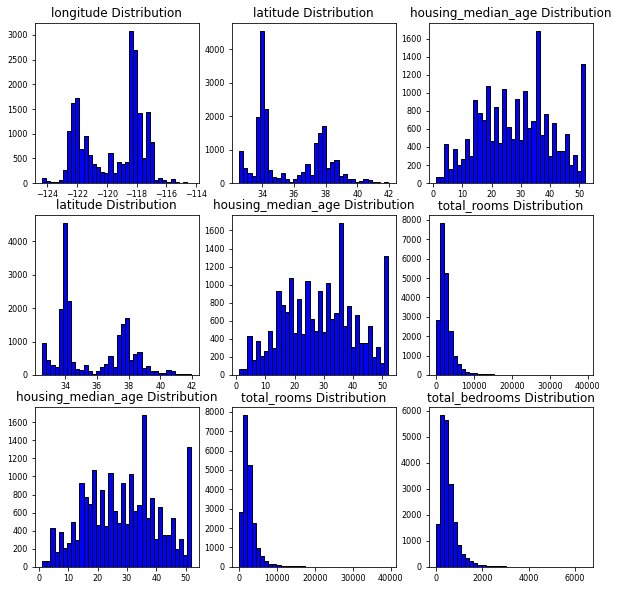

In [3]:
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8)
plt.rcParams["figure.figsize"]=(10, 10)

def histPlotter(X, a, b):
    figure, axis = plt.subplots(a, b)
    for i in range(a):
        for j in range(b):
            axis[i, j].hist(housing[X[i + j]], color="blue", edgecolor= "black", bins=36)
            axis[i, j].set_title(X[i + j] + " Distribution")
newList = []
for column in housing:
    newList.append(column)

histPlotter(newList, 3, 3)
plt.show()


### Dataset has some missing values in it. Checking which ones are missing, refilling them and then testing if managed to do so...

In [4]:
print(housing[housing.isnull().any(axis=1)]) # We can see that total_bedrooms column has missing values.

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  media

### IterativeImputer

In [5]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as II

listVer = housing.iloc

print(housing.loc[290]["total_bedrooms"])
print(housing.loc[341]["total_bedrooms"])
print(housing.loc[538]["total_bedrooms"]) # We can see that these cells are NaN

imputer = II(random_state= 42)
imputed = imputer.fit_transform(housing[housing.columns[:9]])
df_imputed = pd.DataFrame(imputed, columns= housing.columns[:9])
#df_imputed[housing.columns[-1]] = housing[housing.columns[-1]]

print(df_imputed.loc[290]["total_bedrooms"]) # Now we can see that these cells have the mean
print(df_imputed.loc[341]["total_bedrooms"]) # of the total_bedrooms columns' values.
print(df_imputed.loc[538]["total_bedrooms"]) # We have successfully filled the missing cells with SimpleImputer

nan
nan
nan
207.59777113818882
275.4177992563316
1280.669706425319


### Now create a model over median_house_value column.

### At first i check the correlation and Linear Regression.

### After that i one-hot encode the string column and then use StandardScaler over int columns. Then check the correlation and Linear Regression again to see if there are any changes.

In [6]:
df = housing[housing.columns[:9]].corr()

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_imputed.drop(columns = "median_house_value")
Y = df_imputed["median_house_value"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict_train = lr.predict(X_train)
lr_mse = mean_squared_error(Y_train ,Y_predict_train)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

69362.34135238081

In [8]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
feature_array = ohe.fit_transform(housing[["ocean_proximity"]]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
df_encoded = pd.DataFrame(feature_array, columns = feature_labels)

df_encoded

# One-Hot Encoding the categorical feature


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


### Merging meaningful columns

In [9]:
roomsList = []
populationsList = []

roomsList.append((housing.loc[:, "total_rooms"]) / housing.loc[:, "households"])
populationsList.append(housing.loc[:, "population"] / housing.loc[:, "households"])

roomsArray = np.array(roomsList)
populationsArray = np.array(populationsList)

df_imputed_merged = df_imputed

#df_imputed_merged = df_imputed.drop(["households", "population", "total_rooms", "total_bedrooms"], axis= 1)



df_imputed_merged["roomsColumn"] = roomsArray.reshape(-1, 1)
df_imputed_merged["populationsColumn"] = populationsArray.reshape(-1, 1)


df_imputed_merged.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,roomsColumn,populationsColumn
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068398,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066247,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320666,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930133,0.857126,0.918484,0.198050,0.134153,0.133798,-0.024581
total_bedrooms,0.068398,-0.066247,-0.320666,0.930133,1.000000,0.877967,0.979841,-0.008087,0.050590,0.000824,-0.028348
population,0.099773,-0.108785,-0.296244,0.857126,0.877967,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979841,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.008087,0.004834,0.013033,1.000000,0.688075,0.326895,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.050590,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.023737
roomsColumn,-0.027540,0.106389,-0.153277,0.133798,0.000824,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.004852


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_imputed_merged_scaled = pd.DataFrame(scaler.fit_transform(df_imputed_merged), columns = df_imputed_merged.columns)

df_imputed_merged_scaled

# Scaling integer data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,roomsColumn,populationsColumn
0,-1.327835,1.052548,0.982143,-0.804819,-0.970982,-0.974429,-0.977033,2.344766,2.129631,0.628559,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.348966,0.861439,1.669961,2.332238,1.314156,0.327041,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.826134,-0.820777,-0.843637,1.782699,1.258693,1.155620,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.719278,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.085616
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.389214,-0.512592,-0.443449,-1.216128,-1.115804,-0.155023,-0.049110
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.921116,-0.944405,-1.008420,-0.691593,-1.124470,0.276881,0.005021
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125637,-0.369537,-0.174042,-1.142593,-0.992746,-0.090318,-0.071735
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.306104,-0.604429,-0.393753,-1.054583,-1.058608,-0.040211,-0.091225


In [11]:
df_imputed_merged_scaled.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,roomsColumn,populationsColumn
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068398,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066247,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320666,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930133,0.857126,0.918484,0.198050,0.134153,0.133798,-0.024581
total_bedrooms,0.068398,-0.066247,-0.320666,0.930133,1.000000,0.877967,0.979841,-0.008087,0.050590,0.000824,-0.028348
population,0.099773,-0.108785,-0.296244,0.857126,0.877967,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979841,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.008087,0.004834,0.013033,1.000000,0.688075,0.326895,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.050590,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.023737
roomsColumn,-0.027540,0.106389,-0.153277,0.133798,0.000824,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.004852


### Concatenating the numerical part with encoded part

In [12]:
numpyArrayNum = np.array(df_imputed_merged_scaled.loc[:])
numpyArrayCat = np.array(df_encoded.loc[:])
df_prepared = pd.concat([df_imputed_merged_scaled, df_encoded], axis= 1)
df_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,roomsColumn,populationsColumn,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.970982,-0.974429,-0.977033,2.344766,2.129631,0.628559,-0.049597,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.348966,0.861439,1.669961,2.332238,1.314156,0.327041,-0.092512,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.826134,-0.820777,-0.843637,1.782699,1.258693,1.155620,-0.025843,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719278,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.050329,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.085616,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.389214,-0.512592,-0.443449,-1.216128,-1.115804,-0.155023,-0.049110,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.921116,-0.944405,-1.008420,-0.691593,-1.124470,0.276881,0.005021,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125637,-0.369537,-0.174042,-1.142593,-0.992746,-0.090318,-0.071735,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.306104,-0.604429,-0.393753,-1.054583,-1.058608,-0.040211,-0.091225,0.0,1.0,0.0,0.0,0.0


### Checking Linear Regression Again

In [13]:
X = df_prepared.drop(columns = "median_house_value")
Y = df_prepared["median_house_value"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)
lr.fit(X_train, Y_train)
Y_predict_train = lr.predict(X_train)
lr_mse = mean_squared_error(Y_train ,Y_predict_train)
lr_rmse = np.sqrt(lr_mse)
print(lr_rmse)


0.5921501310095371


### Regression on median_income

In [14]:
X = df_prepared.drop(columns = "median_income")
Y = df_prepared["median_income"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
lr.fit(X_train, Y_train)
Y_predict_train = lr.predict(X_train)
Y_predict_test = lr.predict(X_test)
lr_mse1 = mean_squared_error(Y_train, Y_predict_train)
lr_mse2 = mean_squared_error(Y_test, Y_predict_test)
print(np.sqrt(lr_mse1))

0.5684232163712908


In [36]:
from sklearn.tree import DecisionTreeRegressor

X = df_prepared.drop(columns= "median_house_value")
y = df_prepared["median_house_value"]


regressor = DecisionTreeRegressor()
regressor.fit(X.loc[:], y.loc[:])

y_pred = regressor.predict(X.loc[:])
y_pred

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

In [37]:
dtr_mse = mean_squared_error(y.loc[:], y_pred)
dtr_rmse = np.sqrt(dtr_mse)
dtr_rmse

4.271113254555058e-16

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, X, y, cv= 5)
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Mean score of 0.31 with a standard deviation of 0.22


### Using Spearman's Correlation to filter features then check RMSE

In [82]:
df = housing[housing.columns[:9]].corr(method = "spearman")
df = df[["median_house_value"]]
df = df.transpose()

changed_df = df_imputed_merged_scaled
worst_corr = 0.5
for row in range(df.shape[1]):
    if abs(df.loc["median_house_value"][row]) <= worst_corr or df.loc["median_house_value"][row] == 1:
        changed_df = changed_df.drop(df.columns[row], axis= 1)
    
changed_df

,median_income,roomsColumn,populationsColumn
0,2.344766,0.628559,-0.049597
1,2.332238,0.327041,-0.092512
2,1.782699,1.155620,-0.025843
3,0.932968,0.156966,-0.050329
4,-0.012881,0.344711,-0.085616
...,...,...,...
20635,-1.216128,-0.155023,-0.049110
20636,-0.691593,0.276881,0.005021
20637,-1.142593,-0.090318,-0.071735
20638,-1.054583,-0.040211,-0.091225


In [83]:
X = changed_df
Y = df_imputed_merged_scaled["median_house_value"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
lr.fit(X_train, Y_train)
Y_predict_train = lr.predict(X_train)
Y_predict_test = lr.predict(X_test)
lr_mse1 = mean_squared_error(Y_train, Y_predict_train)
lr_mse2 = mean_squared_error(Y_test, Y_predict_test)
print(np.sqrt(lr_mse1))


0.7193473570475327


### Using Pearson's Correlation

In [84]:
df = housing[housing.columns[:9]].corr(method = "pearson")
df = df[["median_house_value"]]
df = df.transpose()

changed_df = df_imputed_merged_scaled
worst_corr = 0.5
for row in range(df.shape[1]):
    if abs(df.loc["median_house_value"][row]) <= worst_corr or df.loc["median_house_value"][row] == 1:
        changed_df = changed_df.drop(df.columns[row], axis= 1)
    
changed_df

,median_income,roomsColumn,populationsColumn
0,2.344766,0.628559,-0.049597
1,2.332238,0.327041,-0.092512
2,1.782699,1.155620,-0.025843
3,0.932968,0.156966,-0.050329
4,-0.012881,0.344711,-0.085616
...,...,...,...
20635,-1.216128,-0.155023,-0.049110
20636,-0.691593,0.276881,0.005021
20637,-1.142593,-0.090318,-0.071735
20638,-1.054583,-0.040211,-0.091225


#### Since the DataFrame is same the RMSE of the model is going to be same...

### Now going to apply PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
pca.fit(df_imputed_scaled)

PCA(n_components=2)

In [19]:
array_pca = pca.transform(df_imputed_scaled)

In [20]:
df_imputed_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.970982,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.348966,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.826134,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719278,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900


In [21]:
print(array_pca)

[[-1.96628217  0.55280898]
 [ 3.0206312   1.30984363]
 [-1.88723075  0.85603586]
 ...
 [-0.51025283  2.11714984]
 [-0.92348763  2.0970686 ]
 [ 0.07999378  2.1149753 ]]


In [22]:
df_pca = pd.DataFrame(array_pca, columns=["PC1", "PC2"])
df_pca

,PC1,PC2
0,-1.966282,0.552809
1,3.020631,1.309844
2,-1.887231,0.856036
3,-1.850257,1.040793
4,-1.717798,1.232482
...,...,...
20635,-1.113938,2.066422
20636,-1.925212,1.892703
20637,-0.510253,2.117150
20638,-0.923488,2.097069


In [23]:
X = np.array(df_pca["PC1"]).reshape(-1, 1)
Y = np.array(df_pca["PC2"]).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
lr.fit(X_train, Y_train)
Y_predict_train = lr.predict(X_train)
Y_predict_test = lr.predict(X_test)
lr_mse1 = mean_squared_error(Y_train, Y_predict_train)
lr_mse2 = mean_squared_error(Y_test, Y_predict_test)
print(np.sqrt(lr_mse1))
print(np.sqrt(lr_mse2))

1.3885610028357895
1.3789781194475845
